# TFM - MVP - CCC PALOS 1

In this Notebook unit PALOS 1 will be explored, ploted, and first MVP will be created.

First of all, a function to plot an hourly bid curve for a specific day will be created.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#df will be all data for unit PALOS1 from november 2019 to october 2020. 
#This data was previously created from OMIE web page

df = pd.read_csv('/home/dsc/Documents/TFM/Data/OMIE/OMIE_PALOS1/OMIE_PALOS1.csv',index_col=0)

In [5]:
df.head()

,Bid_Code,Num_Version,Bid_Unit,Unit_Description,Sell_Buy,Pot_max,Year,Month,Day,Period,Block,Price,Energy
0,6128191,2,PALOS1,C.C. PALOS 1,VNO,394.1,2020,1,1,1,12,180.30,394.1
1,6128191,2,PALOS1,C.C. PALOS 1,VNO,394.1,2020,1,1,2,12,180.30,394.1
2,6128191,2,PALOS1,C.C. PALOS 1,VNO,394.1,2020,1,1,3,1,1.13,50.0
3,6128191,2,PALOS1,C.C. PALOS 1,VNO,394.1,2020,1,1,3,12,180.30,344.1
4,6128191,2,PALOS1,C.C. PALOS 1,VNO,394.1,2020,1,1,4,1,1.13,60.0


In [6]:
df.shape

(71112, 13)

In [7]:
df.tail()

,Bid_Code,Num_Version,Bid_Unit,Unit_Description,Sell_Buy,Pot_max,Year,Month,Day,Period,Block,Price,Energy
71107,6126741,2,PALOS1,C.C. PALOS 1,VNO,394.1,2019,12,31,24,8,43.22,17.0
71108,6126741,2,PALOS1,C.C. PALOS 1,VNO,394.1,2019,12,31,24,9,44.26,17.0
71109,6126741,2,PALOS1,C.C. PALOS 1,VNO,394.1,2019,12,31,24,10,45.31,17.0
71110,6126741,2,PALOS1,C.C. PALOS 1,VNO,394.1,2019,12,31,24,11,46.35,17.0
71111,6126741,2,PALOS1,C.C. PALOS 1,VNO,394.1,2019,12,31,24,12,180.30,34.1


In [8]:
len(df)

71112

In [9]:
df.columns

Index(['Bid_Code', 'Num_Version', 'Bid_Unit', 'Unit_Description', 'Sell_Buy',
       'Pot_max', 'Year', 'Month', 'Day', 'Period', 'Block', 'Price',
       'Energy'],
      dtype='object')

In [10]:
#pd.reset_option('precision')
pd.options.display.float_format = '{:,.2f}'.format

In [11]:
df.describe()

,Bid_Code,Num_Version,Pot_max,Year,Month,Day,Period,Block,Price,Energy
count,"71,112.00","71,112.00","71,112.00","71,112.00","71,112.00","71,112.00","71,112.00","71,112.00","71,112.00","71,112.00"
mean,"6,303,430.78",1.78,394.10,"2,019.86",6.36,15.93,15.88,6.52,52.56,47.00
std,"143,155.02",0.87,0.00,0.35,3.43,8.90,5.27,3.64,48.74,75.62
min,"6,049,903.00",1.00,394.10,"2,019.00",1.00,1.00,1.00,1.00,1.13,3.00
25%,"6,176,254.00",1.00,394.10,"2,020.00",3.00,8.00,12.00,3.00,35.40,17.00
50%,"6,300,456.00",2.00,394.10,"2,020.00",6.00,16.00,16.00,6.00,40.72,17.00
75%,"6,427,697.00",2.00,394.10,"2,020.00",9.00,24.00,20.00,10.00,45.42,17.00
max,"6,555,573.00",5.00,394.10,"2,020.00",12.00,31.00,25.00,12.00,180.30,394.10


In [12]:
#Searching for NaN

if df.shape[0] == df.dropna().shape[0]:
    print('No NaN in df')

No NaN in df


In [13]:
df.dtypes

Bid_Code              int64
Num_Version           int64
Bid_Unit             object
Unit_Description     object
Sell_Buy             object
Pot_max             float64
Year                  int64
Month                 int64
Day                   int64
Period                int64
Block                 int64
Price               float64
Energy              float64
dtype: object

In [14]:
#Picking only the information that will be needed for ploting the bid curve.

df_curve = df[['Pot_max', 'Year', 'Month', 'Day', 'Period', 'Block', 'Price',
       'Energy']]

In [15]:
df_curve.head()

,Pot_max,Year,Month,Day,Period,Block,Price,Energy
0,394.10,2020,1,1,1,12,180.30,394.10
1,394.10,2020,1,1,2,12,180.30,394.10
2,394.10,2020,1,1,3,1,1.13,50.00
3,394.10,2020,1,1,3,12,180.30,344.10
4,394.10,2020,1,1,4,1,1.13,60.00


In [16]:
#Including the week day per each day.

import datetime as dt

df_curve['Date']= pd.to_datetime(df_curve[['Year', 'Month', 'Day']])

<ipython-input-16-749467c0d990>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curve['Date']= pd.to_datetime(df_curve[['Year', 'Month', 'Day']])


In [17]:
df_curve.head()

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date
0,394.10,2020,1,1,1,12,180.30,394.10,2020-01-01
1,394.10,2020,1,1,2,12,180.30,394.10,2020-01-01
2,394.10,2020,1,1,3,1,1.13,50.00,2020-01-01
3,394.10,2020,1,1,3,12,180.30,344.10,2020-01-01
4,394.10,2020,1,1,4,1,1.13,60.00,2020-01-01


In [18]:
df_curve['Weekday'] = df_curve['Date'].apply(lambda x: x.weekday())


<ipython-input-18-89fa5e36ee21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curve['Weekday'] = df_curve['Date'].apply(lambda x: x.weekday())


In [19]:
df_curve.head()

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday
0,394.10,2020,1,1,1,12,180.30,394.10,2020-01-01,2
1,394.10,2020,1,1,2,12,180.30,394.10,2020-01-01,2
2,394.10,2020,1,1,3,1,1.13,50.00,2020-01-01,2
3,394.10,2020,1,1,3,12,180.30,344.10,2020-01-01,2
4,394.10,2020,1,1,4,1,1.13,60.00,2020-01-01,2


In [20]:
weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")

df_curve['Weekday'] = df_curve['Weekday'].apply(lambda x: weekDays[x])

<ipython-input-20-ad44a60512b3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curve['Weekday'] = df_curve['Weekday'].apply(lambda x: weekDays[x])


In [21]:
df_curve.head()

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday
0,394.10,2020,1,1,1,12,180.30,394.10,2020-01-01,Wednesday
1,394.10,2020,1,1,2,12,180.30,394.10,2020-01-01,Wednesday
2,394.10,2020,1,1,3,1,1.13,50.00,2020-01-01,Wednesday
3,394.10,2020,1,1,3,12,180.30,344.10,2020-01-01,Wednesday
4,394.10,2020,1,1,4,1,1.13,60.00,2020-01-01,Wednesday


In [22]:
#Picking an exaple for a certain day

df_curve_example = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date']=='2020-10-31') & 
                                                (df_curve['Period']==24)]

df_curve_example

<ipython-input-22-d9b8cc5aca74>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_curve_example = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date']=='2020-10-31') &


,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday
61033,394.10,2020,10,31,24,1,1.13,190.00,2020-10-31,Saturday
61034,394.10,2020,10,31,24,2,34.89,17.00,2020-10-31,Saturday
61035,394.10,2020,10,31,24,3,35.64,17.00,2020-10-31,Saturday
61036,394.10,2020,10,31,24,4,36.40,17.00,2020-10-31,Saturday
61037,394.10,2020,10,31,24,5,37.15,17.00,2020-10-31,Saturday
61038,394.10,2020,10,31,24,6,38.71,17.00,2020-10-31,Saturday
61039,394.10,2020,10,31,24,7,39.46,17.00,2020-10-31,Saturday
61040,394.10,2020,10,31,24,8,40.22,17.00,2020-10-31,Saturday
61041,394.10,2020,10,31,24,9,41.47,17.00,2020-10-31,Saturday
61042,394.10,2020,10,31,24,10,42.73,17.00,2020-10-31,Saturday


In [23]:
df_curve_example['Energy'].cumsum()

61033   190.00
61034   207.00
61035   224.00
61036   241.00
61037   258.00
61038   275.00
61039   292.00
61040   309.00
61041   326.00
61042   343.00
61043   360.00
61044   394.10
Name: Energy, dtype: float64

In [24]:
df_curve['Energy_tot'] = df_curve.groupby(['Date','Period'])['Energy'].cumsum()

<ipython-input-24-3bb43226947c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curve['Energy_tot'] = df_curve.groupby(['Date','Period'])['Energy'].cumsum()


In [25]:
df_curve.head()

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot
0,394.10,2020,1,1,1,12,180.30,394.10,2020-01-01,Wednesday,394.10
1,394.10,2020,1,1,2,12,180.30,394.10,2020-01-01,Wednesday,394.10
2,394.10,2020,1,1,3,1,1.13,50.00,2020-01-01,Wednesday,50.00
3,394.10,2020,1,1,3,12,180.30,344.10,2020-01-01,Wednesday,394.10
4,394.10,2020,1,1,4,1,1.13,60.00,2020-01-01,Wednesday,60.00


In [26]:
df_curve_example2 = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date']=='2020-10-31') & 
                                                (df_curve['Period']==24)]


df_curve_example2.reset_index(drop=True,inplace=True)

<ipython-input-26-1704094d25ac>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_curve_example2 = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date']=='2020-10-31') &


In [27]:
df_curve_example2

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot
0,394.10,2020,10,31,24,1,1.13,190.00,2020-10-31,Saturday,190.00
1,394.10,2020,10,31,24,2,34.89,17.00,2020-10-31,Saturday,207.00
2,394.10,2020,10,31,24,3,35.64,17.00,2020-10-31,Saturday,224.00
3,394.10,2020,10,31,24,4,36.40,17.00,2020-10-31,Saturday,241.00
4,394.10,2020,10,31,24,5,37.15,17.00,2020-10-31,Saturday,258.00
5,394.10,2020,10,31,24,6,38.71,17.00,2020-10-31,Saturday,275.00
6,394.10,2020,10,31,24,7,39.46,17.00,2020-10-31,Saturday,292.00
7,394.10,2020,10,31,24,8,40.22,17.00,2020-10-31,Saturday,309.00
8,394.10,2020,10,31,24,9,41.47,17.00,2020-10-31,Saturday,326.00
9,394.10,2020,10,31,24,10,42.73,17.00,2020-10-31,Saturday,343.00


In [28]:
#Example to create the plot function
#This part of the code will be deleted

df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date']=='2020-10-22') & 
                                                (df_curve['Period']==24)]

<ipython-input-28-a0db271286b4>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date']=='2020-10-22') &


,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot
59230,394.10,2020,10,22,24,1,1.13,190.00,2020-10-22,Thursday,190.00
59231,394.10,2020,10,22,24,2,35.34,17.00,2020-10-22,Thursday,207.00
59232,394.10,2020,10,22,24,3,36.11,17.00,2020-10-22,Thursday,224.00
59233,394.10,2020,10,22,24,4,36.87,17.00,2020-10-22,Thursday,241.00
59234,394.10,2020,10,22,24,5,37.64,17.00,2020-10-22,Thursday,258.00
59235,394.10,2020,10,22,24,6,39.20,17.00,2020-10-22,Thursday,275.00
59236,394.10,2020,10,22,24,7,39.97,17.00,2020-10-22,Thursday,292.00
59237,394.10,2020,10,22,24,8,40.74,17.00,2020-10-22,Thursday,309.00
59238,394.10,2020,10,22,24,9,42.00,17.00,2020-10-22,Thursday,326.00
59239,394.10,2020,10,22,24,10,43.27,17.00,2020-10-22,Thursday,343.00


In [29]:
xs = np.linspace(0,len(df_curve_example2),len(df_curve_example2))

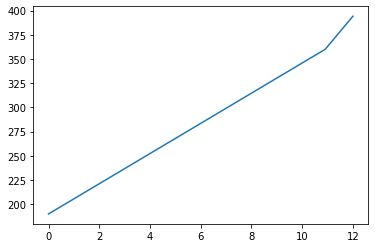

In [30]:
plt.plot(xs, df_curve_example2['Energy_tot'])

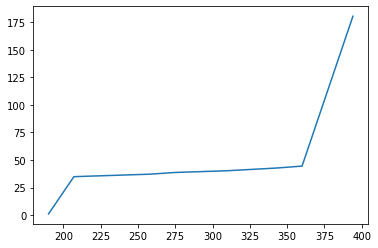

In [31]:
plt.plot(df_curve_example2['Energy_tot'],df_curve_example2['Price'])

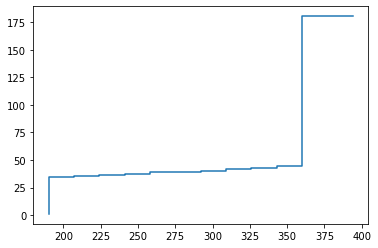

In [32]:
plt.step(df_curve_example2['Energy_tot'],df_curve_example2['Price'], label='pre (default)')

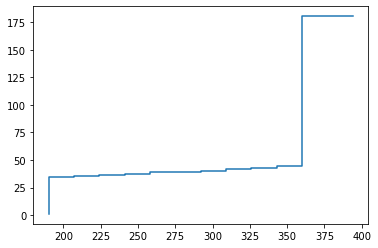

In [33]:
plt.plot(df_curve_example2['Energy_tot'],
         df_curve_example2['Price'], 
         drawstyle='steps', label='steps (=steps-pre)')

In [235]:
#Function to plot bid curves for a chosen date and period (hour)

def plot_bid_curve(date, period):
    df_plot = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date'] == date) & 
                                                (df_curve['Period'] == period)]
    df_plot_new = pd.DataFrame([[0,0,0,0,0,0,df_curve['Price'].min(),0,0,0,0]],columns=list(df_plot.columns))
    df_plot_0 = df_plot.append(df_plot_new)
    df_plot_0 = df_plot_0.sort_values(['Energy_tot'])
     
    return plt.plot(df_plot_0['Energy_tot'], df_plot_0['Price'], drawstyle='steps', label='steps (=steps-pre)')

#The first step should be included

<ipython-input-235-facc86817a2c>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_plot = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date'] == date) &


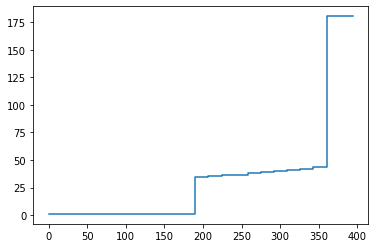

In [243]:
plot_bid_curve('2020-8-25',24)

<ipython-input-235-facc86817a2c>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_plot = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date'] == date) &


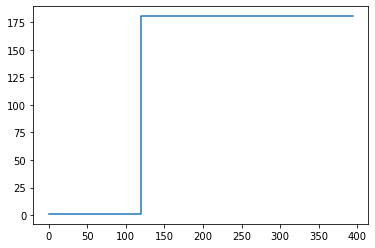

In [244]:
plot_bid_curve('2020-8-25',5)

<ipython-input-235-facc86817a2c>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_plot = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date'] == date) &


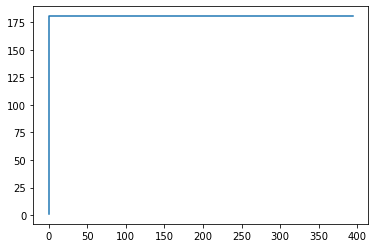

In [245]:
plot_bid_curve('2020-8-25',1)

In [246]:
#It seems that the number of blocks for each period is equal for the hole year.

In [249]:
#Checking blocks for one day

df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date']=='2019-11-22') & 
                                                (df_curve['Period']==9)]

<ipython-input-249-94ee1757ac6a>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date']=='2019-11-22') &


,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot
62699,394.10,2019,11,22,9,1,1.13,190.00,2019-11-22,Friday,190.00
62700,394.10,2019,11,22,9,2,39.25,17.00,2019-11-22,Friday,207.00
62701,394.10,2019,11,22,9,3,40.34,17.00,2019-11-22,Friday,224.00
62702,394.10,2019,11,22,9,4,41.43,17.00,2019-11-22,Friday,241.00
62703,394.10,2019,11,22,9,5,42.53,17.00,2019-11-22,Friday,258.00
62704,394.10,2019,11,22,9,6,43.62,17.00,2019-11-22,Friday,275.00
62705,394.10,2019,11,22,9,7,44.71,17.00,2019-11-22,Friday,292.00
62706,394.10,2019,11,22,9,8,45.80,17.00,2019-11-22,Friday,309.00
62707,394.10,2019,11,22,9,9,46.89,17.00,2019-11-22,Friday,326.00
62708,394.10,2019,11,22,9,10,47.99,17.00,2019-11-22,Friday,343.00


In [250]:
#Checking blocks for one day

df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date']=='2020-10-22') & 
                                                (df_curve['Period']==9)]

<ipython-input-250-c892746408ab>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date']=='2020-10-22') &


,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot
59056,394.10,2020,10,22,9,1,1.13,190.00,2020-10-22,Thursday,190.00
59057,394.10,2020,10,22,9,2,35.34,17.00,2020-10-22,Thursday,207.00
59058,394.10,2020,10,22,9,3,36.11,17.00,2020-10-22,Thursday,224.00
59059,394.10,2020,10,22,9,4,36.87,17.00,2020-10-22,Thursday,241.00
59060,394.10,2020,10,22,9,5,37.64,14.00,2020-10-22,Thursday,255.00
59061,394.10,2020,10,22,9,12,180.30,139.10,2020-10-22,Thursday,394.10


## CREATING A MVP CONSIDERING ONLY PRICE AS TARGET

### CREATING THE DATASET TO USE THE MODELS

First of all, a dataframe for using different kind of models are created.

The first choice is to use only Month, Day, Period, Block, Energy, Price. As Energy seems to be almost equal all the time, the first models will use Energy as feature. Future models will use Energy also as target.

In [40]:
df.head()

,Bid_Code,Num_Version,Bid_Unit,Unit_Description,Sell_Buy,Pot_max,Year,Month,Day,Period,Block,Price,Energy
0,6128191,2,PALOS1,C.C. PALOS 1,VNO,394.10,2020,1,1,1,12,180.30,394.10
1,6128191,2,PALOS1,C.C. PALOS 1,VNO,394.10,2020,1,1,2,12,180.30,394.10
2,6128191,2,PALOS1,C.C. PALOS 1,VNO,394.10,2020,1,1,3,1,1.13,50.00
3,6128191,2,PALOS1,C.C. PALOS 1,VNO,394.10,2020,1,1,3,12,180.30,344.10
4,6128191,2,PALOS1,C.C. PALOS 1,VNO,394.10,2020,1,1,4,1,1.13,60.00


In [41]:
df_curve.head()

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot
0,394.10,2020,1,1,1,12,180.30,394.10,2020-01-01,Wednesday,394.10
1,394.10,2020,1,1,2,12,180.30,394.10,2020-01-01,Wednesday,394.10
2,394.10,2020,1,1,3,1,1.13,50.00,2020-01-01,Wednesday,50.00
3,394.10,2020,1,1,3,12,180.30,344.10,2020-01-01,Wednesday,394.10
4,394.10,2020,1,1,4,1,1.13,60.00,2020-01-01,Wednesday,60.00


### FIRST MODEL

The first set of models will be created considering "One Hot Encoding" for categorical variables dropping the first variable and Standirizing by the maximum the remaining variable.

The second set of models will be built without dropping the first variable in One Hot Encoding

In [42]:
#Most of the variables are categorical:Month, Day, Period, Weekday and Block.
#Only Energy_tot is not categorical.
#One-hot encoding will be used to convert variables from categorical to binary.

from sklearn.preprocessing import OneHotEncoder


#It is importat to point out that 'Year' is not considered since it seems does not give relevant info to the
#models

df_curve_cat = df_curve[['Month','Day','Period','Weekday','Block']]

In [43]:
one_encoder = OneHotEncoder(drop=None, sparse=False) #Changing 'first' with 'None'
one_encoder.fit(df_curve_cat)

OneHotEncoder(sparse=False)

In [44]:
df_curve_cat_onehot = one_encoder.transform(df_curve_cat)

In [45]:
df_curve_cat_onehot

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [46]:
type(df_curve['Energy_tot'].max())

float

In [47]:
#Energy is normalize with the maximum

from numpy import asarray

df_curve_energy = np.asarray(df_curve[['Energy_tot']]/df_curve['Energy_tot'].max())
df_curve_energy

array([[1.        ],
       [1.        ],
       [0.12687135],
       ...,
       [0.87033748],
       [0.91347374],
       [1.        ]])

In [48]:
df_curve_cat_onehot.shape, df_curve_energy.shape

((71112, 87), (71112, 1))

In [49]:
df_curve_energy.shape

(71112, 1)

In [50]:
X = np.concatenate((df_curve_cat_onehot, df_curve_energy), axis=1)

In [51]:
X.shape

(71112, 88)

In [52]:
y = np.asarray(df_curve['Price'])

In [53]:
y.shape

(71112,)

In [54]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [55]:
#Splitting Test set and Train set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

## REGRESSION MODELS

In [260]:
## LINEAR REGRESSION

from sklearn.linear_model import LinearRegression

#Creation of a model instance 
reg_linear = LinearRegression()

reg_linear.fit(X_train,y_train)


LinearRegression()

In [261]:
y_pred_linear = reg_linear.predict(X_test)

In [262]:
reg_linear.coef_

array([-9.98463005e+10, -9.98463005e+10, -9.98463005e+10, -9.98463005e+10,
       -9.98463005e+10, -9.98463005e+10, -9.98463005e+10, -9.98463005e+10,
       -9.98463005e+10, -9.98463005e+10, -9.98463005e+10, -9.98463005e+10,
        7.92298277e+10,  7.92298277e+10,  7.92298277e+10,  7.92298277e+10,
        7.92298277e+10,  7.92298277e+10,  7.92298277e+10,  7.92298277e+10,
        7.92298277e+10,  7.92298277e+10,  7.92298277e+10,  7.92298277e+10,
        7.92298277e+10,  7.92298277e+10,  7.92298277e+10,  7.92298277e+10,
        7.92298277e+10,  7.92298277e+10,  7.92298277e+10,  7.92298277e+10,
        7.92298277e+10,  7.92298277e+10,  7.92298277e+10,  7.92298277e+10,
        7.92298277e+10,  7.92298277e+10,  7.92298277e+10,  7.92298277e+10,
        7.92298277e+10,  7.92298277e+10,  7.92298277e+10,  9.67738097e+12,
        9.67738097e+12,  9.67738097e+12,  9.67738097e+12,  9.67738097e+12,
        9.67738097e+12,  9.67738097e+12,  9.67738097e+12,  9.67738097e+12,
        9.67738097e+12,  

In [263]:
#MAE metric
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,y_pred_linear) # Primero valor real y luego prediccion

1.9946090399353158

In [147]:
## K-NEIGHBORS REGRESSION

#from sklearn.neighbors import KNeighborsRegressor

In [150]:
#reg_kneig = KNeighborsRegressor(n_neighbors=10)

#reg_kneig.fit(X_train,y_train)


KNeighborsRegressor(n_neighbors=10)

In [151]:
#y_pred_kneig = reg_kneig.predict(X_test)


In [152]:
# MAE
#mean_absolute_error(y_test,y_pred_kneig)

0.3730708008155806

In [68]:
# RMSE from linear regression

from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test,y_pred_linear))

2.9004693431312716

In [154]:
# RMSE: k Nei
#np.sqrt(mean_squared_error(y_test,y_pred_kneig))

0.7570955998489847

In [72]:


## X-validation for linear regression

from sklearn.model_selection import cross_val_score

#X-val for LINEAR REGRESSION
#cv=5 (by default)

cross_val_score(reg_linear,X,y,scoring="neg_mean_absolute_error")

array([-6.93247864e+11, -1.35685522e+11, -6.03775018e+11, -6.85291436e+11,
       -1.25108025e+12])

In [156]:
#NO ENTIENDO QUÉ ESTÁ PASANDO AQUÍ... ¿CÓMO ES POSIBLE QUE PRIMERO SALGA DEL ORDEN DE 2 Y LUEGO DEL ORDEN DE 2e12?

In [80]:
cross_val_score(reg_linear,X,y,scoring="neg_mean_absolute_error").mean()

-673816018121.8248

In [158]:
#X-val for K-NEIGHBORS
#cross_val_score(reg_kneig,X,y,scoring="neg_mean_absolute_error")

array([-4.98565275, -3.93704078, -3.59623646, -1.19427415, -3.42797405])

In [159]:
#############################################################################################################

In [160]:
#Examples of real and predition curves will be ploted to compare them.

<ipython-input-235-facc86817a2c>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_plot = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date'] == date) &


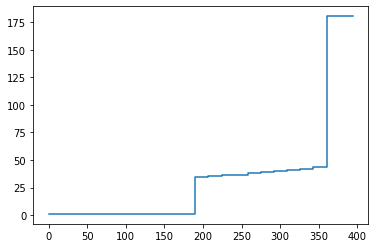

In [251]:
plot_bid_curve('2020-8-16',18)

In [252]:
DATE = '2020-08-16'
PERIOD = 18

example = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date']==DATE) & 
                                                (df_curve['Period']==PERIOD)]
example

<ipython-input-252-c9177357fcf0>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  example = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date']==DATE) &


,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot
45825,394.10,2020,8,16,18,1,1.13,190.00,2020-08-16,Sunday,190.00
45826,394.10,2020,8,16,18,2,34.48,17.00,2020-08-16,Sunday,207.00
45827,394.10,2020,8,16,18,3,35.22,17.00,2020-08-16,Sunday,224.00
45828,394.10,2020,8,16,18,4,35.97,17.00,2020-08-16,Sunday,241.00
45829,394.10,2020,8,16,18,5,36.72,17.00,2020-08-16,Sunday,258.00
45830,394.10,2020,8,16,18,6,38.26,17.00,2020-08-16,Sunday,275.00
45831,394.10,2020,8,16,18,7,39.01,17.00,2020-08-16,Sunday,292.00
45832,394.10,2020,8,16,18,8,39.76,17.00,2020-08-16,Sunday,309.00
45833,394.10,2020,8,16,18,9,41.00,17.00,2020-08-16,Sunday,326.00
45834,394.10,2020,8,16,18,10,42.25,17.00,2020-08-16,Sunday,343.00


In [253]:
example_cat = example[['Month','Day','Period','Weekday','Block']]
example_cat

,Month,Day,Period,Weekday,Block
45825,8,16,18,Sunday,1
45826,8,16,18,Sunday,2
45827,8,16,18,Sunday,3
45828,8,16,18,Sunday,4
45829,8,16,18,Sunday,5
45830,8,16,18,Sunday,6
45831,8,16,18,Sunday,7
45832,8,16,18,Sunday,8
45833,8,16,18,Sunday,9
45834,8,16,18,Sunday,10


In [254]:
# example transformation to predict only this sample.
example_cat_onehot = one_encoder.transform(example_cat)
example_cat_onehot.shape

(12, 87)

In [255]:
example_cat_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [256]:
example_energy = np.asarray(example[['Energy_tot']]/example['Energy_tot'].max())
example_energy

array([[0.48211114],
       [0.5252474 ],
       [0.56838366],
       [0.61151992],
       [0.65465618],
       [0.69779244],
       [0.7409287 ],
       [0.78406496],
       [0.82720122],
       [0.87033748],
       [0.91347374],
       [1.        ]])

In [257]:
example_X = np.concatenate((example_cat_onehot, example_energy), axis=1)

In [258]:
example_y = np.asarray(example['Price'])

In [264]:
#Example with linear regression

example_y_pred_linear = reg_linear.predict(example_X)

In [265]:
example_y_pred_linear

array([ -0.2421875 ,  34.015625  ,  34.9140625 ,  35.8203125 ,
        36.7109375 ,  38.0234375 ,  38.91796875,  39.77734375,
        40.96875   ,  42.2265625 ,  43.78125   , 178.84375   ])

In [266]:
example_y

array([  1.13,  34.48,  35.22,  35.97,  36.72,  38.26,  39.01,  39.76,
        41.  ,  42.25,  43.99, 180.3 ])

<ipython-input-235-facc86817a2c>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_plot = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date'] == date) &


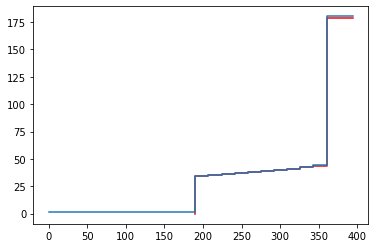

In [268]:
plt.plot(example['Energy_tot'], example_y_pred_linear, drawstyle='steps', label='steps (=steps-pre)', color='red')
plot_bid_curve('2020-8-16',18)

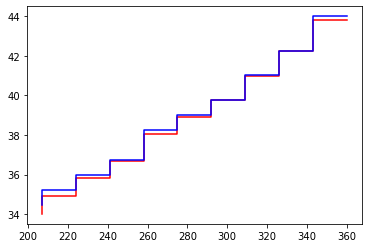

In [269]:
plt.plot(example['Energy_tot'][1:-1], example_y_pred_linear[1:-1], drawstyle='steps', 
         label='steps (=steps-pre)', color='red')

plt.plot(example['Energy_tot'][1:-1], example_y[1:-1], drawstyle='steps', 
         label='steps (=steps-pre)', color='blue')

In [95]:
#Example with k-neighbors regression

#example_y_pred_kneig = reg_kneig.predict(example_X)

In [96]:
#example_y_pred_kneig

In [97]:
example_y

array([  1.13,  34.48,  35.22,  35.97,  36.72,  38.26,  39.01,  39.76,
        41.  ,  42.25,  43.99, 180.3 ])

In [98]:
#plt.plot(example['Energy_tot'], example_y_pred_kneig, drawstyle='steps', label='steps (=steps-pre)', color='red')
#plot_bid_curve('2020-8-16',18)

In [99]:
#plt.plot(example['Energy_tot'][1:-1], example_y_pred_kneig[1:-1], drawstyle='steps', 
#         label='steps (=steps-pre)', color='red')

#plt.plot(example['Energy_tot'][1:-1], example_y[1:-1], drawstyle='steps', 
#         label='steps (=steps-pre)', color='blue')

In [179]:
#Tiene pinta de que el primer precio es muy variable porque lo calcula muy mal. 
#Esto es debido a que no todas las segmentaciones de las horas son iguales por lo que ese primer valor puede no
#estar bien estimado. 
#POSIBLE ARREGLO: dividir todas las horas en un mismo número de bloques (12, por ejemplo), asignando un mismo
#valor de energía a todos los segmentos nuevos --> ¿relación con la predicción de dos variables?

In [180]:
##########################################################################################################


In [100]:
#DECISION TREES

from sklearn.tree import DecisionTreeRegressor

reg_dt = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)

reg_dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)

In [101]:
y_pred_dt = reg_dt.predict(X_test)

In [102]:
# MAE
mean_absolute_error(y_test,y_pred_dt)

2.894665914717577

In [103]:
# RMSE from decision trees

np.sqrt(mean_squared_error(y_test,y_pred_dt))

4.373318211757926

In [104]:
#Example with decision tree regression

example_y_pred_dt = reg_dt.predict(example_X)

In [105]:
example_y_pred_dt

array([  1.13      ,  40.84850377,  40.84850377,  40.84850377,
        40.84850377,  40.84850377,  40.84850377,  40.84850377,
        40.84850377,  40.84850377,  40.84850377, 180.3       ])

In [106]:
example_y

array([  1.13,  34.48,  35.22,  35.97,  36.72,  38.26,  39.01,  39.76,
        41.  ,  42.25,  43.99, 180.3 ])

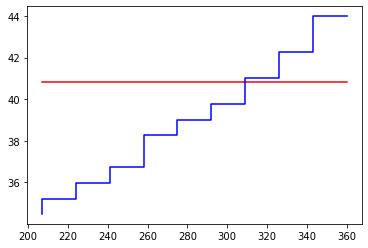

In [107]:
plt.plot(example['Energy_tot'][1:-1], example_y_pred_dt[1:-1], drawstyle='steps', 
         label='steps (=steps-pre)', color='red')

plt.plot(example['Energy_tot'][1:-1], example_y[1:-1], drawstyle='steps', 
         label='steps (=steps-pre)', color='blue')

In [108]:
#It seems that this decision tree is not good. In order to optimize the dt regression, GridSearchCV is tried.
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

reg_gdt = GridSearchCV(DecisionTreeRegressor(),
                      param_grid={"max_depth":np.arange(2,11),
                                  "min_samples_leaf":np.arange(10,100,15)},
                      scoring="neg_mean_absolute_error")
reg_gdt.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_leaf': array([10, 25, 40, 55, 70, 85])},
             scoring='neg_mean_absolute_error')

In [109]:
reg_gdt.best_params_

{'max_depth': 10, 'min_samples_leaf': 10}

In [110]:
y_pred_gdt = reg_gdt.predict(X_test)

In [111]:
# MAE
mean_absolute_error(y_test,y_pred_gdt)

1.2024494040484845

In [112]:
# RMSE from decision trees

np.sqrt(mean_squared_error(y_test,y_pred_gdt))

2.2344272230350852

In [113]:
#Example with grid decision tree regression

example_y_pred_gdt = reg_gdt.predict(example_X)

In [114]:
example_y_pred_gdt

array([  1.13      ,  34.46063613,  35.20403423,  35.9445974 ,
        36.68439024,  38.22180556,  38.98059459,  39.73936   ,
        40.96344633,  44.63532702,  44.63532702, 180.3       ])

In [115]:
example_y

array([  1.13,  34.48,  35.22,  35.97,  36.72,  38.26,  39.01,  39.76,
        41.  ,  42.25,  43.99, 180.3 ])

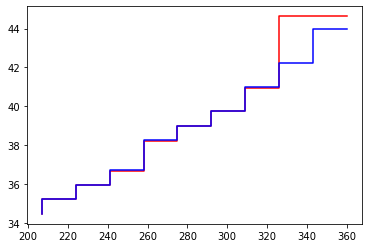

In [116]:
plt.plot(example['Energy_tot'][1:-1], example_y_pred_gdt[1:-1], drawstyle='steps', 
         label='steps (=steps-pre)', color='red')

plt.plot(example['Energy_tot'][1:-1], example_y[1:-1], drawstyle='steps', 
         label='steps (=steps-pre)', color='blue')

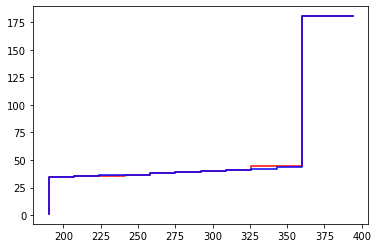

In [117]:
#We can observe that with dt first and last price are very good predicted

plt.plot(example['Energy_tot'], example_y_pred_gdt, drawstyle='steps', 
         label='steps (=steps-pre)', color='red')

plt.plot(example['Energy_tot'], example_y, drawstyle='steps', 
         label='steps (=steps-pre)', color='blue')

In [118]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor

reg_rf = RandomForestRegressor(n_estimators=100)

reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [119]:
y_pred_ft = reg_rf.predict(X_test)

In [120]:
# MAE
mean_absolute_error(y_test,y_pred_ft)

0.0015079800331508967

In [121]:
# RMSE from random forest

np.sqrt(mean_squared_error(y_test,y_pred_ft))

0.029676476712297145

In [122]:
#Example with random forest regression

example_y_pred_rf = reg_rf.predict(example_X)

In [123]:
example_y_pred_rf

array([  1.13,  34.48,  35.22,  35.97,  36.72,  38.26,  39.01,  39.76,
        41.  ,  42.25,  43.99, 180.3 ])

In [124]:
example_y

array([  1.13,  34.48,  35.22,  35.97,  36.72,  38.26,  39.01,  39.76,
        41.  ,  42.25,  43.99, 180.3 ])

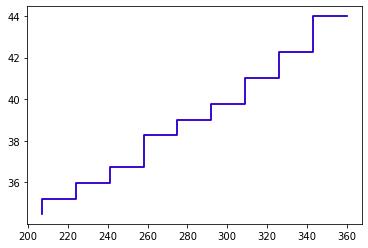

In [125]:
plt.plot(example['Energy_tot'][1:-1], example_y_pred_rf[1:-1], drawstyle='steps', 
         label='steps (=steps-pre)', color='red')

plt.plot(example['Energy_tot'][1:-1], example_y[1:-1], drawstyle='steps', 
         label='steps (=steps-pre)', color='blue')

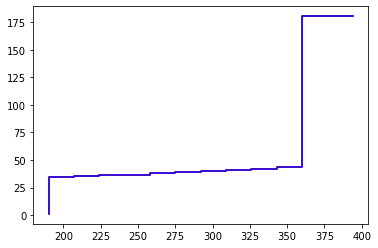

In [126]:
#We can observe that with dt first and last price are very good predicted

plt.plot(example['Energy_tot'], example_y_pred_rf, drawstyle='steps', 
         label='steps (=steps-pre)', color='red')

plt.plot(example['Energy_tot'], example_y, drawstyle='steps', 
         label='steps (=steps-pre)', color='blue')

In [127]:
#XG-BOOST

from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
reg_XGB = GradientBoostingRegressor(max_depth=4, n_estimators=100,learning_rate=0.1)

In [60]:
reg_XGB.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=4)

In [65]:
y_pred_XGB = reg_XGB.predict(X_test)

In [66]:
#MAE
mean_absolute_error(y_test,y_pred_XGB)

1.0194010218797669

In [69]:
# RMSE
np.sqrt(mean_squared_error(y_test,y_pred_XGB))

1.549636993371683

In [73]:
cross_val_score(reg_XGB,X,y,scoring="neg_mean_absolute_error").mean()

-2.5924303014607193

In [128]:
from sklearn.model_selection import GridSearchCV

reg_XGB_CV = GridSearchCV(GradientBoostingRegressor(n_estimators=50),
                  param_grid={"max_depth":np.arange(2,10),
                             "learning_rate":np.arange(1,10)/10},
                  scoring="neg_mean_absolute_error",
                  cv=5)

In [129]:
reg_XGB_CV.fit(X,y)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(n_estimators=50),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='neg_mean_absolute_error')

In [130]:
reg_XGB_CV.best_params_

{'learning_rate': 0.4, 'max_depth': 8}

In [131]:
y_pred_XGB_CV = reg_XGB_CV.predict(X_test)

In [132]:
# MAE
mean_absolute_error(y_test,y_pred_XGB_CV)

0.1027228501937115

In [133]:
# RMSE from random forest

np.sqrt(mean_squared_error(y_test,y_pred_XGB_CV))

0.1377227240423566

## MULTI-OUTPUT REGRESSION MODELS

In this section, several multi-output regression models will be develop to predict Energy_tot and Price.

First of all, new features set and target set is created.

In [57]:
y.shape, df_curve_energy.shape

((71112,), (71112, 1))

In [60]:
len(df_curve_energy)

71112

In [68]:
y_mo = np.concatenate((df_curve_energy,y.reshape(len(y),1)),axis=1)

In [69]:
y_mo.shape

(71112, 2)

In [71]:
X_mo = df_curve_cat_onehot

In [72]:
type(X_mo), type(y_mo)

(numpy.ndarray, numpy.ndarray)

In [73]:
X_mo.shape, y_mo.shape

((71112, 87), (71112, 2))

In [74]:
#Splitting Test set and Train set

from sklearn.model_selection import train_test_split

X_mo_train, X_mo_test, y_mo_train, y_mo_test = train_test_split(X_mo, y_mo, test_size=0.20, random_state=1)

Now, different models will be tested, first trying multi-output without using MultiOutput function, and then using it.

### MULTI-OUTPUT LINEAR REGRESSION

In [78]:
from sklearn.linear_model import LinearRegression

#Creation of a model instance 
reg_linear_mo = LinearRegression()

reg_linear_mo.fit(X_mo_train,y_mo_train)

LinearRegression()

In [81]:
y_mo_pred_linear = reg_linear_mo.predict(X_mo_test)

reg_linear_mo.coef_

array([[-6.93985325e+07, -6.93985325e+07, -6.93985325e+07,
        -6.93985325e+07, -6.93985325e+07, -6.93985325e+07,
        -6.93985325e+07, -6.93985325e+07, -6.93985325e+07,
        -6.93985325e+07, -6.93985325e+07, -6.93985325e+07,
        -4.18710682e+08, -4.18710682e+08, -4.18710682e+08,
        -4.18710682e+08, -4.18710682e+08, -4.18710682e+08,
        -4.18710682e+08, -4.18710682e+08, -4.18710682e+08,
        -4.18710682e+08, -4.18710682e+08, -4.18710682e+08,
        -4.18710682e+08, -4.18710682e+08, -4.18710682e+08,
        -4.18710682e+08, -4.18710682e+08, -4.18710682e+08,
        -4.18710682e+08, -4.18710682e+08, -4.18710682e+08,
        -4.18710682e+08, -4.18710682e+08, -4.18710682e+08,
        -4.18710682e+08, -4.18710682e+08, -4.18710682e+08,
        -4.18710682e+08, -4.18710682e+08, -4.18710682e+08,
        -4.18710682e+08, -1.54999683e+10, -1.54999683e+10,
        -1.54999683e+10, -1.54999683e+10, -1.54999683e+10,
        -1.54999683e+10, -1.54999683e+10, -1.54999683e+1

In [82]:
#MAE metric
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_mo_test,y_mo_pred_linear) # Primero valor real y luego prediccion

1.0023842092201134

#### MULTI-OUTPUT LINEAR REGRESSION USING A WRAPPER

##### DIRECT WRAPPER

In [94]:
from sklearn.multioutput import MultiOutputRegressor

wrapper_linear = MultiOutputRegressor(reg_linear_mo)

In [95]:
wrapper_linear.fit(X_mo_train,y_mo_train)

MultiOutputRegressor(estimator=LinearRegression())

In [96]:
y_mo_pred_wrapper_linear = wrapper_linear.predict(X_mo_test)

In [97]:
#We can see that is almost exactly the same result that usign multi-output without a wrapper
mean_absolute_error(y_mo_test,y_mo_pred_wrapper_linear)

1.0024598953927397

##### CHAINED WRAPPER

In [98]:
from sklearn.multioutput import RegressorChain

wrapper_chain_linear = RegressorChain(reg_linear_mo, order=[0,1])

In [99]:
wrapper_chain_linear.fit(X_mo_train,y_mo_train)

RegressorChain(base_estimator=LinearRegression(), order=[0, 1])

In [100]:
y_mo_pred_wrapper_chain_linear = wrapper_chain_linear.predict(X_mo_test)

In [101]:
#We can see that is almost exactly the same result that usign multi-output without a wrapper
mean_absolute_error(y_mo_test,y_mo_pred_wrapper_chain_linear)

1.002907607724878

### MULTI-OUTPUT DECISION TREE REGRESSION

In [83]:
#DECISION TREES

from sklearn.tree import DecisionTreeRegressor

reg_dt_mo = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)

reg_dt_mo.fit(X_mo_train,y_mo_train)

y_mo_pred_dt = reg_dt_mo.predict(X_mo_test)


In [84]:
# MAE
mean_absolute_error(y_mo_test,y_mo_pred_dt)


1.4925360651341952

In [85]:
# RMSE from decision trees
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_mo_test,y_mo_pred_dt))

3.093425336786656

In [86]:
#In order to optimize the Decision Tree regression, GridSearchCV is tried.

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

reg_gdt_mo = GridSearchCV(DecisionTreeRegressor(),
                      param_grid={"max_depth":np.arange(2,11),
                                  "min_samples_leaf":np.arange(10,100,15)},
                      scoring="neg_mean_absolute_error")
reg_gdt_mo.fit(X_mo_train,y_mo_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_leaf': array([10, 25, 40, 55, 70, 85])},
             scoring='neg_mean_absolute_error')

In [87]:
reg_gdt_mo.best_params_

{'max_depth': 10, 'min_samples_leaf': 10}

In [88]:
y_mo_pred_gdt = reg_gdt_mo.predict(X_mo_test)

# MAE
mean_absolute_error(y_mo_test,y_mo_pred_gdt)

0.7479312341161604

In [89]:
# RMSE from decision trees

np.sqrt(mean_squared_error(y_mo_test,y_mo_pred_gdt))

1.7317071890964135

#### MULTI-OUTPUT LINEAR REGRESSION USING A WRAPPER

##### DIRECT WRAPPER

Decision Tree optimized with GridSearchCV will be used.

In [107]:
from sklearn.multioutput import MultiOutputRegressor

wrapper_dt = MultiOutputRegressor(reg_gdt_mo)

In [108]:
wrapper_dt.fit(X_mo_train,y_mo_train)

MultiOutputRegressor(estimator=GridSearchCV(estimator=DecisionTreeRegressor(),
                                            param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                                        'min_samples_leaf': array([10, 25, 40, 55, 70, 85])},
                                            scoring='neg_mean_absolute_error'))

In [109]:
y_mo_pred_wrapper_dt = wrapper_dt.predict(X_mo_test)

In [110]:
#We can see that is almost exactly the same result that usign multi-output without a wrapper
mean_absolute_error(y_mo_test,y_mo_pred_wrapper_dt)

0.7375162595337502

##### CHAINED WRAPPER

In [115]:
from sklearn.multioutput import RegressorChain

wrapper_chain_dt = RegressorChain(reg_gdt_mo, order=[0,1])

In [116]:
wrapper_chain_dt.fit(X_mo_train,y_mo_train)

RegressorChain(base_estimator=GridSearchCV(estimator=DecisionTreeRegressor(),
                                           param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                                       'min_samples_leaf': array([10, 25, 40, 55, 70, 85])},
                                           scoring='neg_mean_absolute_error'),
               order=[0, 1])

In [117]:
y_mo_pred_wrapper_chain_dt = wrapper_chain_dt.predict(X_mo_test)

In [118]:
#In this case, the erros is a little bit lower
mean_absolute_error(y_mo_test,y_mo_pred_wrapper_chain_dt)

0.6071761229531638

### MULTI-OUTPUT RANDOM FOREST REGRESSION

In [90]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor

reg_rf_mo = RandomForestRegressor(n_estimators=100)

reg_rf_mo.fit(X_mo_train,y_mo_train)

y_mo_pred_ft = reg_rf_mo.predict(X_mo_test)

In [91]:
# MAE
mean_absolute_error(y_mo_test,y_mo_pred_ft)

9.868352925579539e-05

In [92]:
# RMSE from random forest

np.sqrt(mean_squared_error(y_mo_test,y_mo_pred_ft))

0.0023395849273037546

### MULTI-OUTPUT XGBOOST REGRESSION

In [119]:
#Pending to check --> I takes too long to run

### CHECKING RESULTS GRAPHICALLY

#### CHECKING LINEAR REGRESSION

In [312]:
def example_pred_linear_mo(DATE,PERIOD):

    example = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date']==DATE) & 
                                (df_curve['Period']==PERIOD)]
    example_cat = example[['Month','Day','Period','Weekday','Block']]
    example_cat_onehot = one_encoder.transform(example_cat)
    example_energy = np.asarray(example[['Energy_tot']]/example['Energy_tot'].max())
    example_y = np.asarray(example['Price'])
    example_y_mo = np.concatenate((example_energy,example_y.reshape(len(example_y),1)),axis=1)
    example_X_mo = example_cat_onehot
    example_y_mo_pred_linear = reg_linear_mo.predict(example_X_mo)
    
    return example_y_mo_pred_linear, example_y, example


In [313]:
DATE = '2020-4-24'
PERIOD = 20

example_pred_linear_mo, example_y_mo, example_mo = example_pred_linear_mo(DATE,PERIOD)

<ipython-input-312-ee4951abefc6>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  example = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date']==DATE) &


In [314]:
Pmax = df_curve['Pot_max'].max()

In [315]:
example_pred_linear_mo

array([[  0.45312119,   5.07421875],
       [  0.52669907,  39.43945312],
       [  0.56980515,  40.3203125 ],
       [  0.6129303 ,  41.2265625 ],
       [  0.65568924,  42.09960938],
       [  0.69887543,  43.43945312],
       [  0.7417717 ,  44.32421875],
       [  0.78485489,  45.18945312],
       [  0.82793045,  46.375     ],
       [  0.87113953,  47.63867188],
       [  0.9142952 ,  49.1875    ],
       [  1.02713394, 184.328125  ]])

In [316]:
example_pred_linear_mo[:,0]*Pmax

array([178.57505913, 207.57210197, 224.56020775, 241.55583038,
       258.40712929, 275.42680588, 292.33222618, 309.31131172,
       326.28739052, 343.31608734, 360.32373695, 404.7934864 ])

<ipython-input-235-facc86817a2c>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_plot = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date'] == date) &


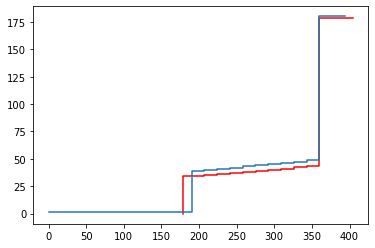

In [317]:
plt.plot(example_pred_linear[:,0]*Pmax, example_pred_linear[:,1], drawstyle='steps', label='steps (=steps-pre)', color='red')
plot_bid_curve(DATE,PERIOD)

#### CHECKING RANDOM FOREST REGRESSION

In [319]:
def example_pred_rf_mo(DATE,PERIOD):

    example = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date']==DATE) & 
                                (df_curve['Period']==PERIOD)]
    example_cat = example[['Month','Day','Period','Weekday','Block']]
    example_cat_onehot = one_encoder.transform(example_cat)
    example_energy = np.asarray(example[['Energy_tot']]/example['Energy_tot'].max())
    example_y = np.asarray(example['Price'])
    example_y_mo = np.concatenate((example_energy,example_y.reshape(len(example_y),1)),axis=1)
    example_X_mo = example_cat_onehot
    example_y_mo_pred_linear = reg_rf_mo.predict(example_X_mo)
    
    return example_y_mo_pred_linear, example_y, example

In [320]:
DATE = '2020-4-24'
PERIOD = 20

example_pred_rf_mo, example_y_rf_mo, example_rf_mo = example_pred_rf_mo(DATE,PERIOD)

<ipython-input-319-b2ba79dac5a5>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  example = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date']==DATE) &


In [321]:
example_pred_rf_mo

array([[  0.48211114,   1.13      ],
       [  0.5252474 ,  38.9322    ],
       [  0.56838366,  39.77      ],
       [  0.61151992,  40.62      ],
       [  0.65465618,  41.46      ],
       [  0.69779244,  43.11      ],
       [  0.7409287 ,  43.95      ],
       [  0.78406496,  44.8       ],
       [  0.82720122,  46.14      ],
       [  0.87033748,  47.49      ],
       [  0.91347374,  49.33      ],
       [  1.        , 180.3       ]])

In [322]:
example_pred_rf_mo[:,0]*Pmax

array([190. , 207. , 224. , 241. , 258. , 275. , 292. , 309. , 326. ,
       343. , 360. , 394.1])

<ipython-input-235-facc86817a2c>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_plot = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date'] == date) &


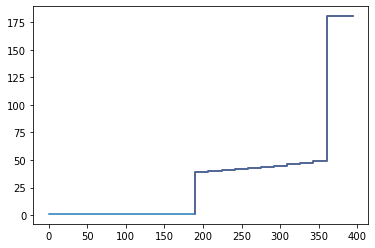

In [324]:
plt.plot(example_pred_rf_mo[:,0]*Pmax, example_pred_rf_mo[:,1], 
         drawstyle='steps', 
         label='steps (=steps-pre)', 
         color='red')
plot_bid_curve(DATE,PERIOD)

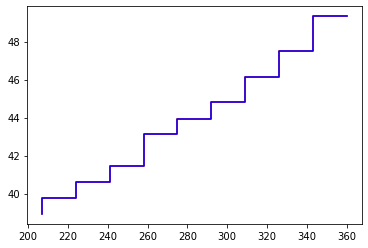

In [343]:
plt.plot((example_pred_rf_mo[:,0]*Pmax)[1:-1], example_pred_rf_mo[:,1][1:-1], 
         drawstyle='steps', 
         label='steps (=steps-pre)', 
         color='red')

plt.plot(example_rf_mo['Energy_tot'][1:-1], example_rf_mo['Price'][1:-1], 
         drawstyle='steps', 
         label='steps (=steps-pre)', 
         color='blue')